Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Importing the Datasets

In [3]:
# Load the datasets
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')

# Display basic information about the datasets
print(train_df.info())
print(test_df.info())
print(train_df.describe())
print(test_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

 2. Exploratory Data Analysis (EDA)

In [27]:
data=[train_df,test_df]
for dataset in data:
    #FILTER CATEGORICAL VARIABLES
    categorical_columns=[x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']
    #EXCLUDE ID COLS AND SOURCE:
    categorical_columns =[x for x in categorical_columns if x not in['ID']]


    #PRINT FREQUENCY OF CATEGORIES
for col in categorical_columns:
    print('\nFrequency of categories for variable %s'%col)
    print(train_df[col].value_counts())




Frequency of categories for variable Gender
Gender
F    19549
M     9616
Name: count, dtype: int64

Frequency of categories for variable Has a car
Has a car
N    18128
Y    11037
Name: count, dtype: int64

Frequency of categories for variable Has a property
Has a property
Y    19557
N     9608
Name: count, dtype: int64

Frequency of categories for variable Employment status
Employment status
Working                 15056
Commercial associate     6801
Pensioner                4920
State servant            2381
Student                     7
Name: count, dtype: int64

Frequency of categories for variable Education level
Education level
Secondary / secondary special    19803
Higher education                  7910
Incomplete higher                 1129
Lower secondary                    298
Academic degree                     25
Name: count, dtype: int64

Frequency of categories for variable Marital status
Marital status
Married                 20044
Single / not married     3864
Civil mar

In [5]:
train_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [7]:
test_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,7.292000e+03,7292.000000,7.292000e+03,7292.000000,7292.000000,7292.0,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000,7292.000000
mean,5.078209e+06,0.428415,1.858672e+05,-15957.958722,59283.630691,1.0,0.230389,0.294158,0.087493,2.202139,-26.270022,0.016045
std,4.208243e+04,0.744350,1.032964e+05,4190.990010,137642.577749,0.0,0.421111,0.455695,0.282576,0.909726,16.563032,0.125657
min,5.008809e+06,0.000000,2.700000e+04,-25152.000000,-15661.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.041912e+06,0.000000,1.170000e+05,-19382.000000,-3141.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.069416e+06,0.000000,1.575000e+05,-15522.000000,-1534.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.115503e+06,1.000000,2.250000e+05,-12454.000000,-397.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150487e+06,14.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,0.000000,1.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7292 entries, 0 to 7291
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   7292 non-null   int64  
 1   Gender               7292 non-null   object 
 2   Has a car            7292 non-null   object 
 3   Has a property       7292 non-null   object 
 4   Children count       7292 non-null   int64  
 5   Income               7292 non-null   float64
 6   Employment status    7292 non-null   object 
 7   Education level      7292 non-null   object 
 8   Marital status       7292 non-null   object 
 9   Dwelling             7292 non-null   object 
 10  Age                  7292 non-null   int64  
 11  Employment length    7292 non-null   int64  
 12  Has a mobile phone   7292 non-null   int64  
 13  Has a work phone     7292 non-null   int64  
 14  Has a phone          7292 non-null   int64  
 15  Has an email         7292 non-null   i

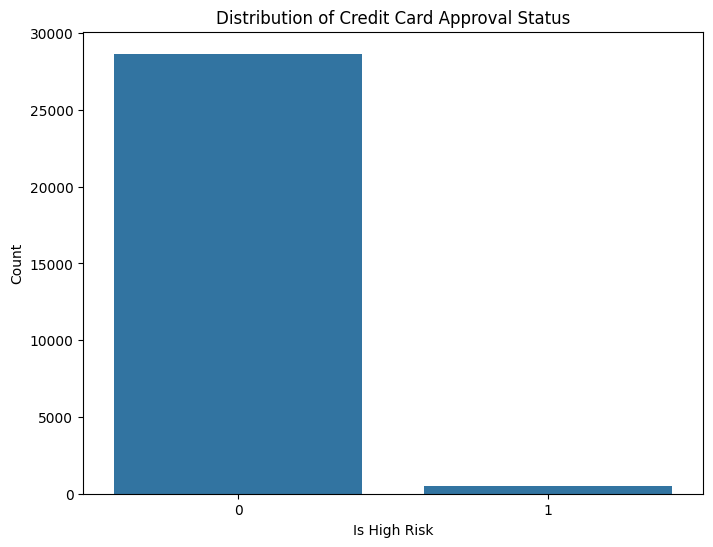

In [10]:
# Univariate Analysis

# Plot distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Is high risk', data=train_df)
plt.title('Distribution of Credit Card Approval Status')
plt.xlabel('Is High Risk')
plt.ylabel('Count')
plt.show()

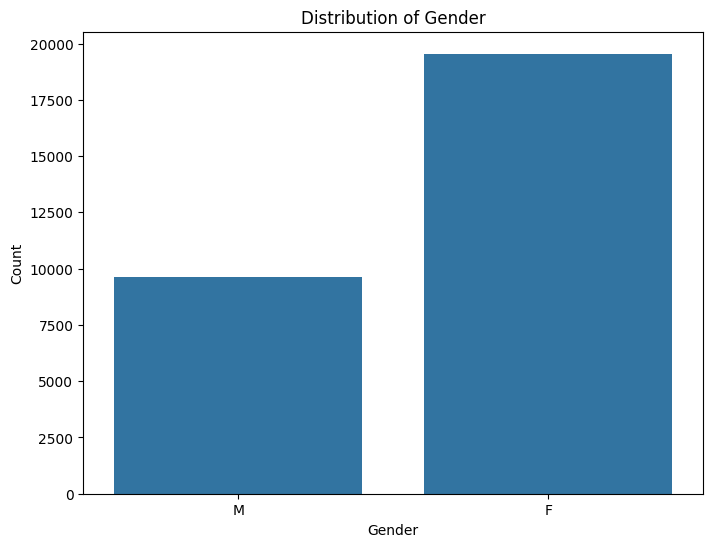

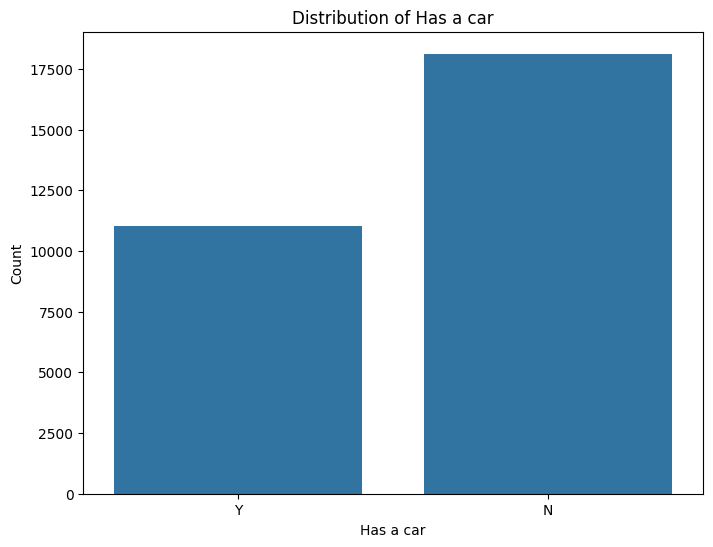

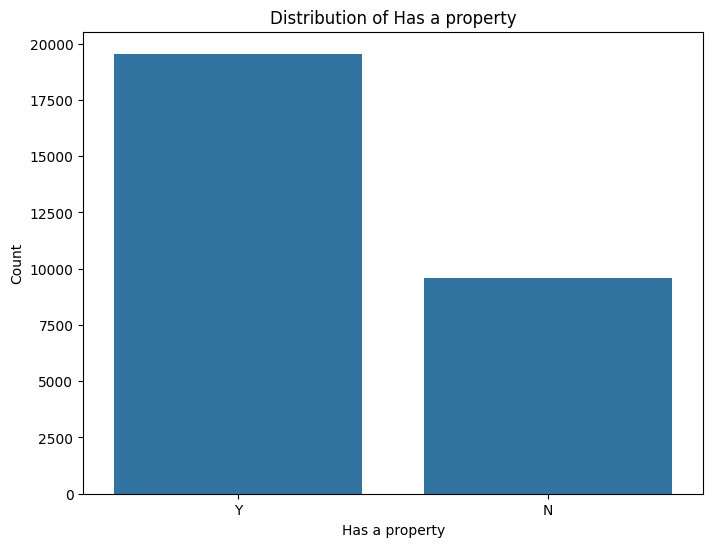

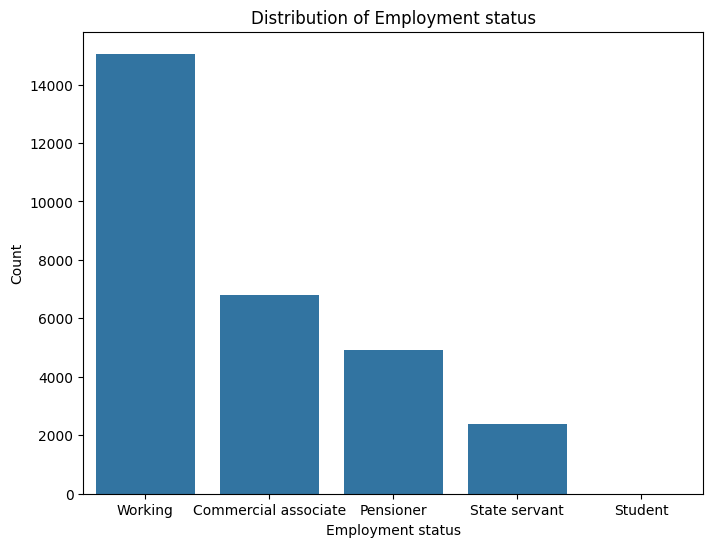

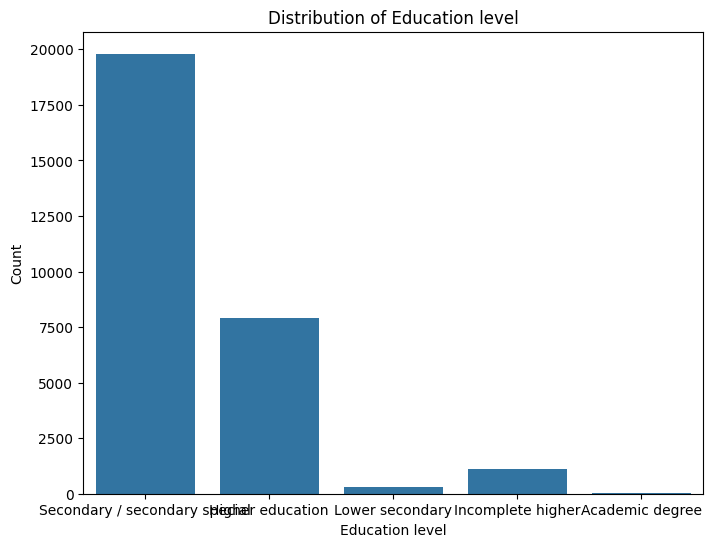

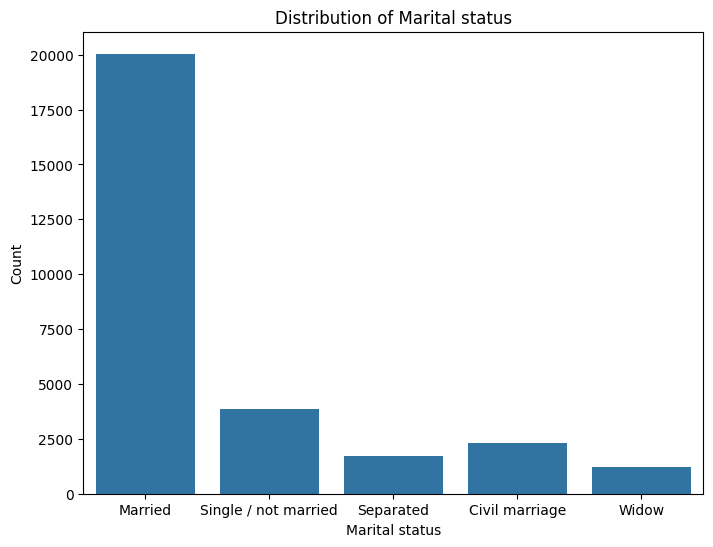

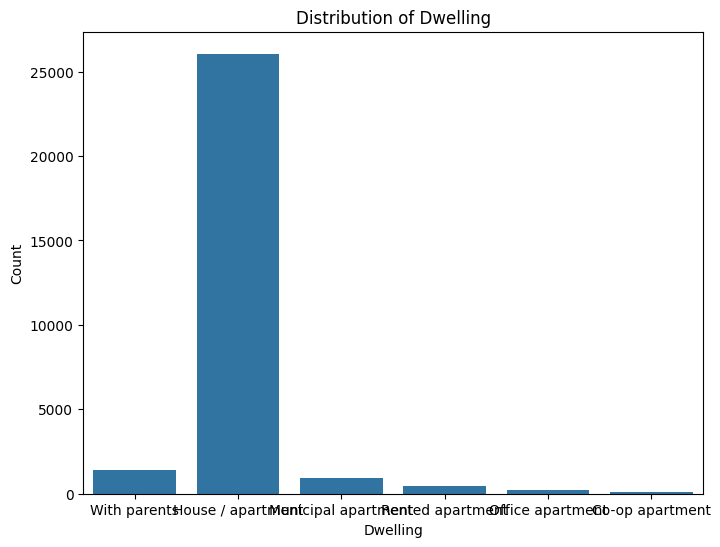

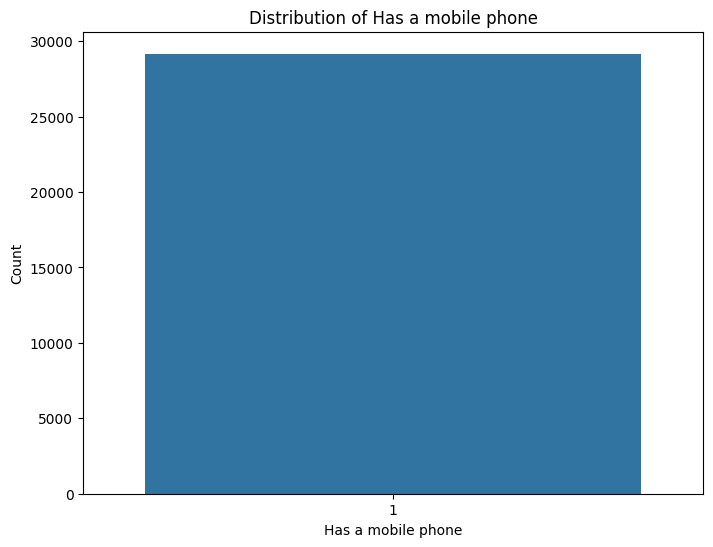

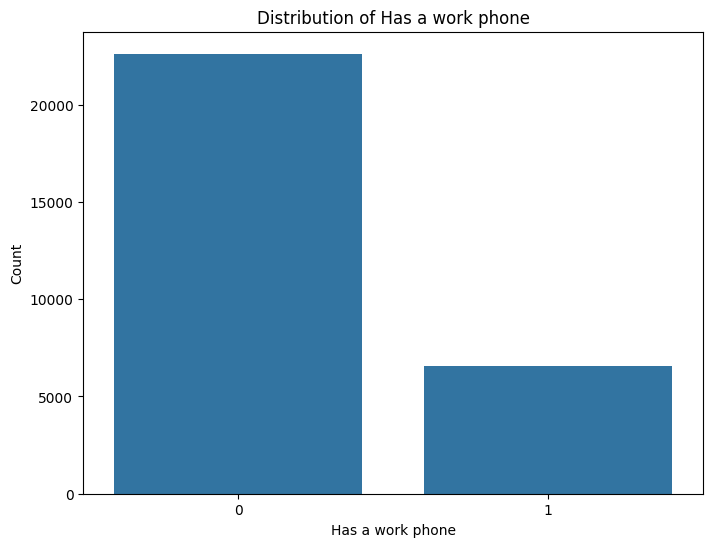

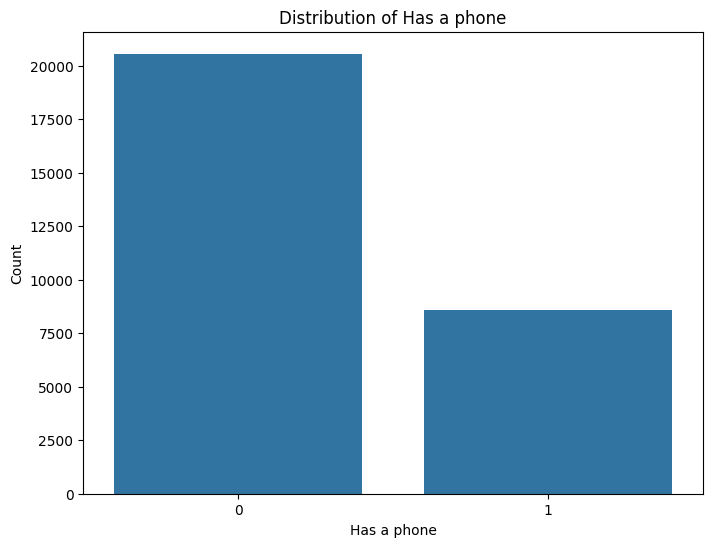

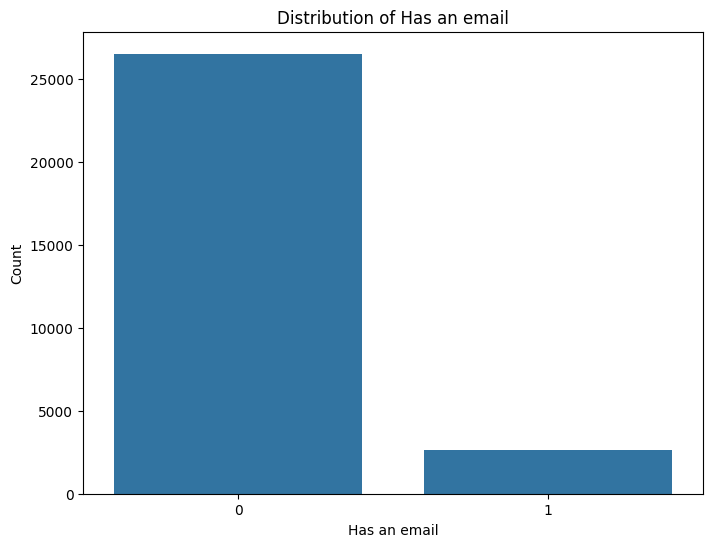

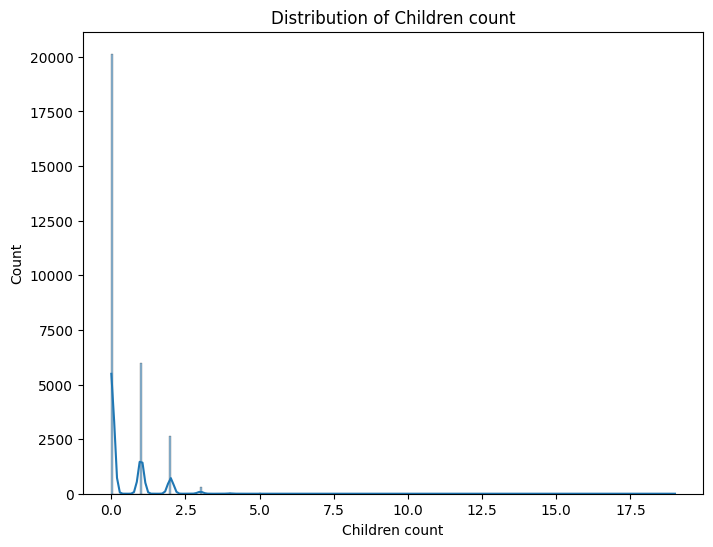

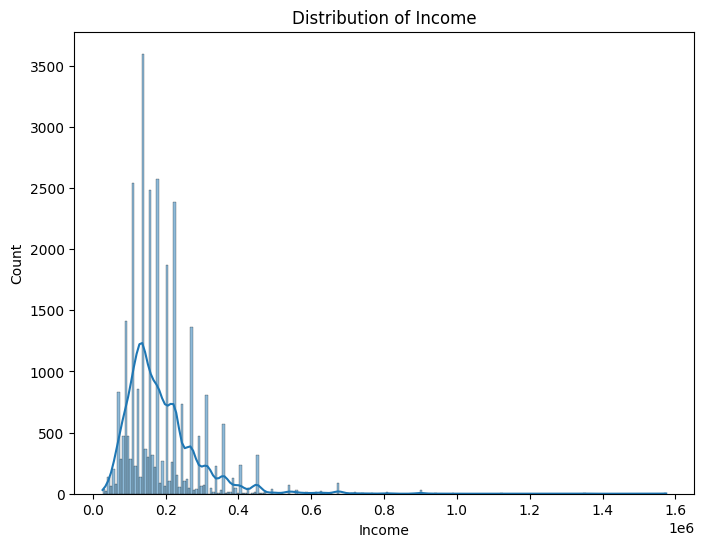

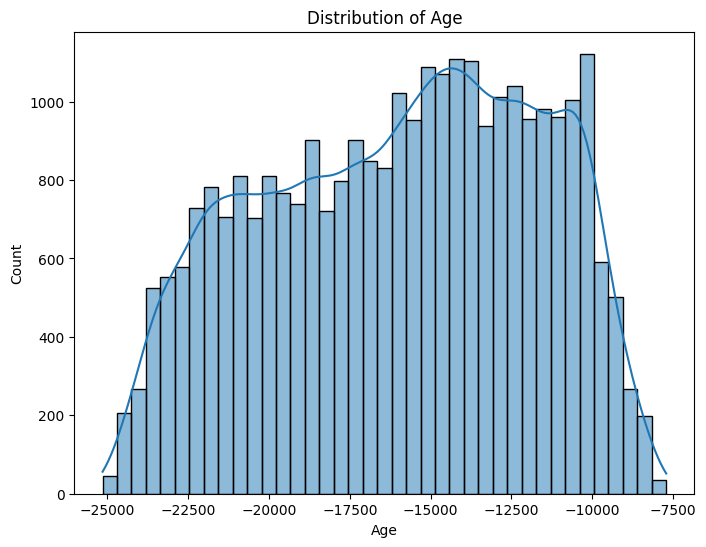

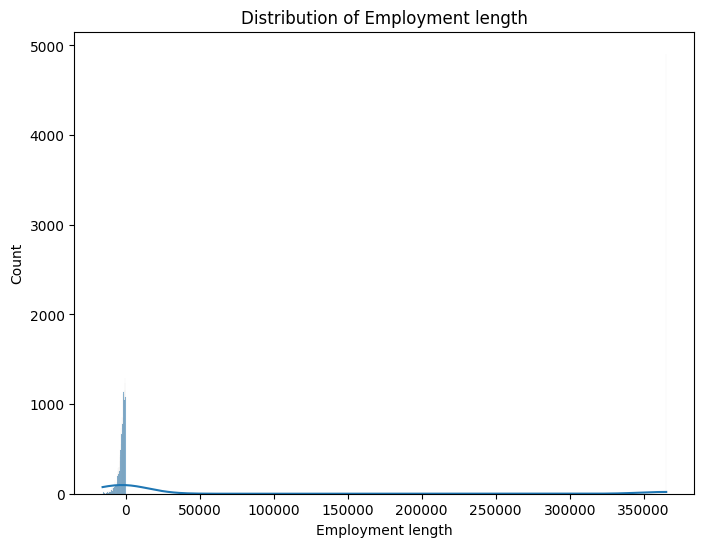

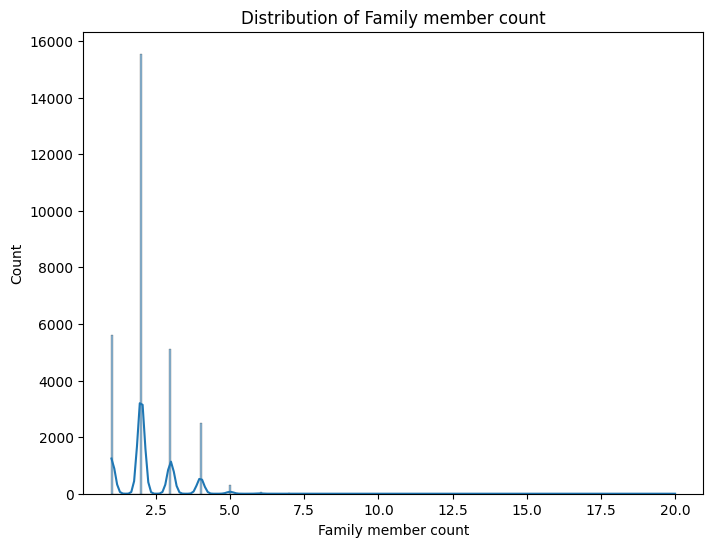

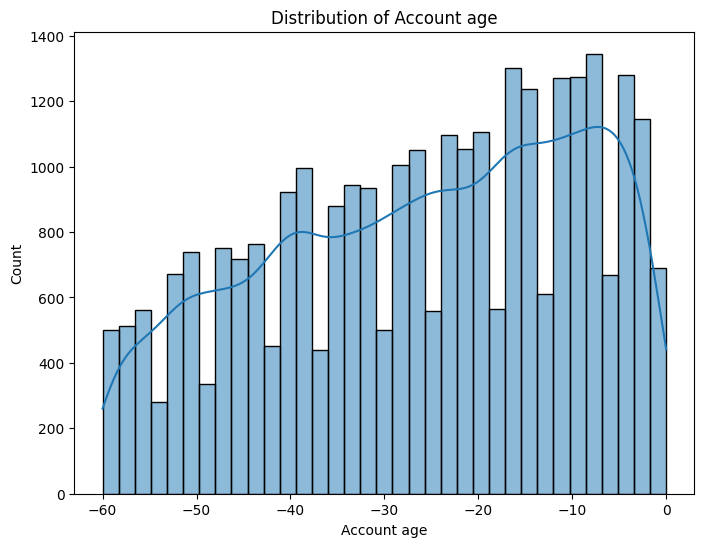

In [11]:
# Plot distribution of categorical features
categorical_features = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=train_df)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

# Plot distribution of numerical features
numerical_features = ['Children count', 'Income', 'Age', 'Employment length', 'Family member count', 'Account age']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(train_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()



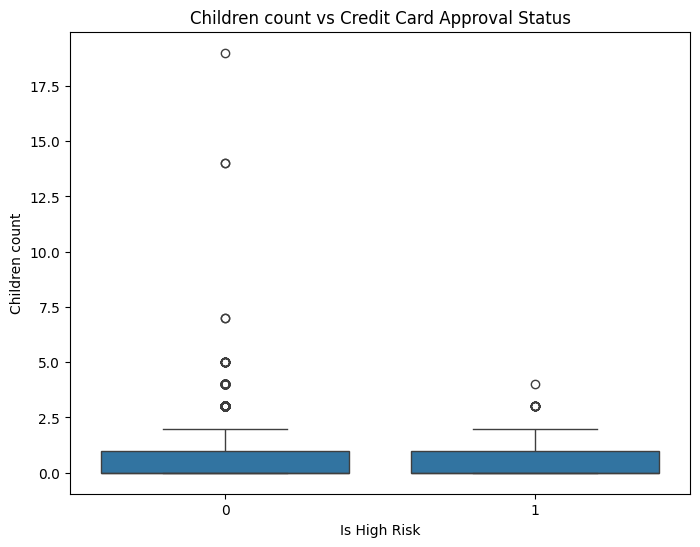

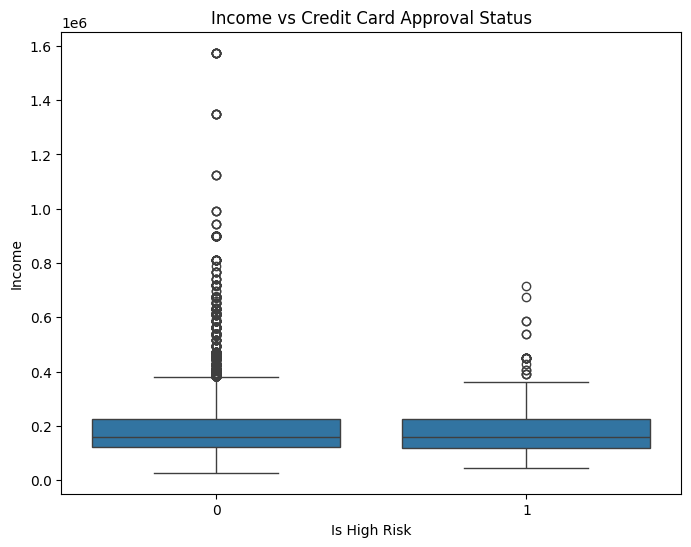

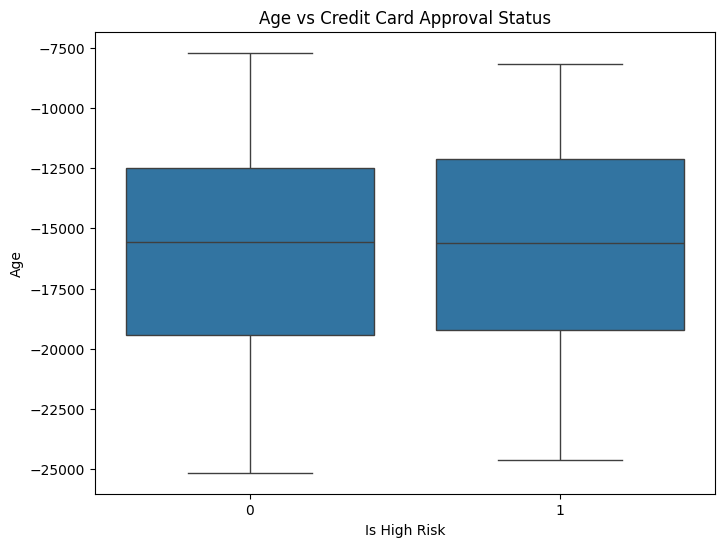

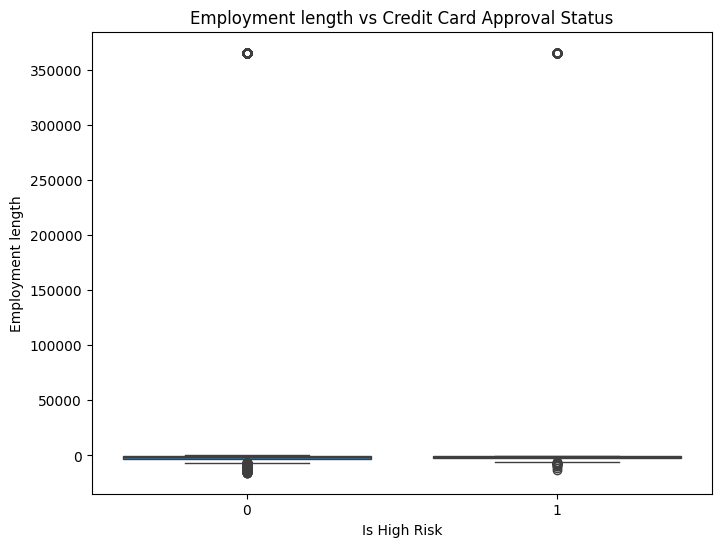

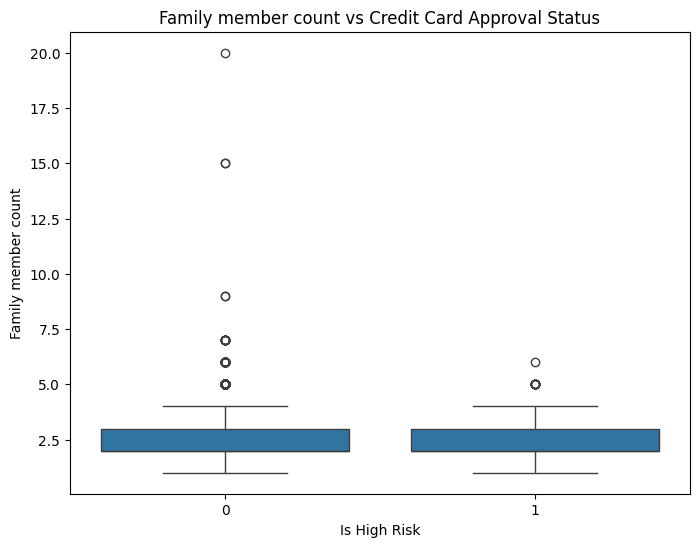

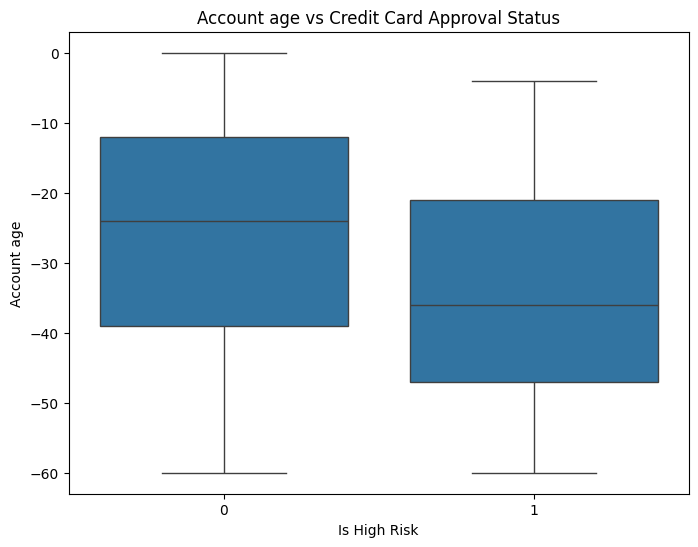

In [12]:
# Bivariate Analysis

# Plot relationship between numerical features and target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Is high risk', y=feature, data=train_df)
    plt.title(f'{feature} vs Credit Card Approval Status')
    plt.xlabel('Is High Risk')
    plt.ylabel(feature)
    plt.show()

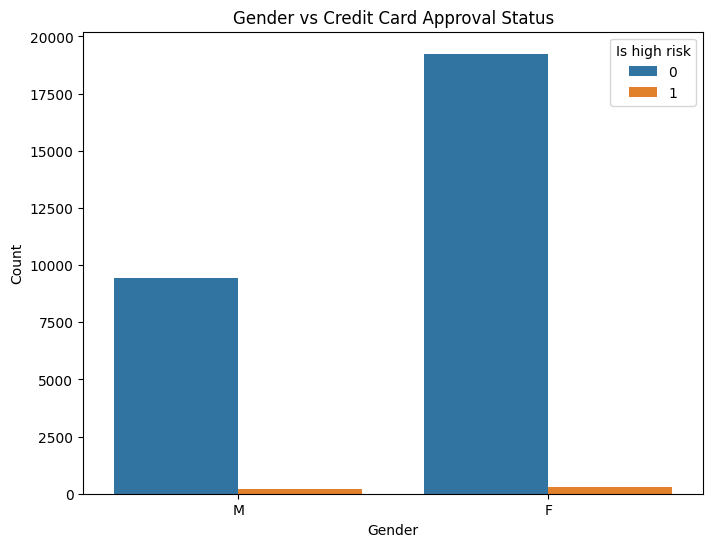

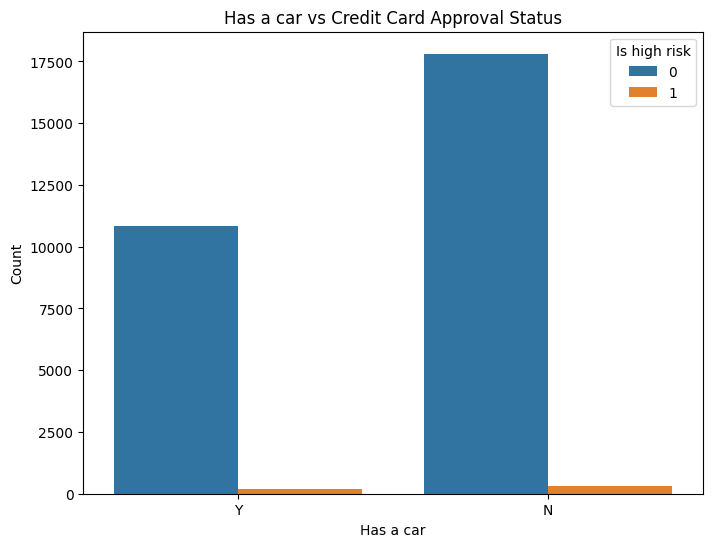

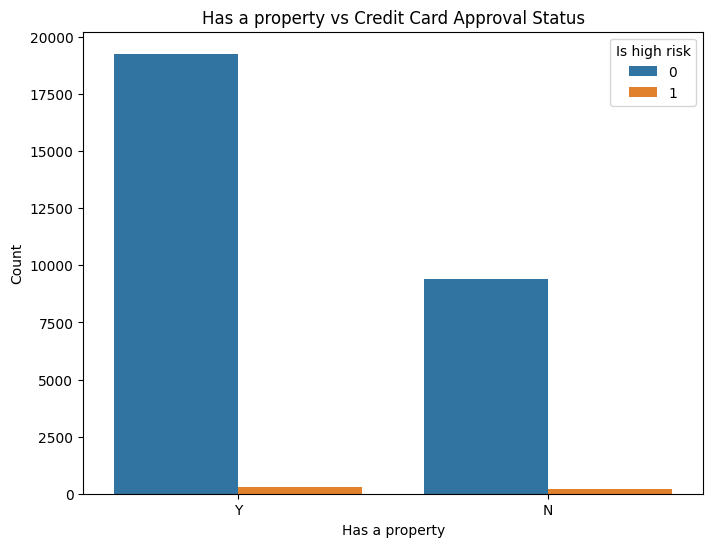

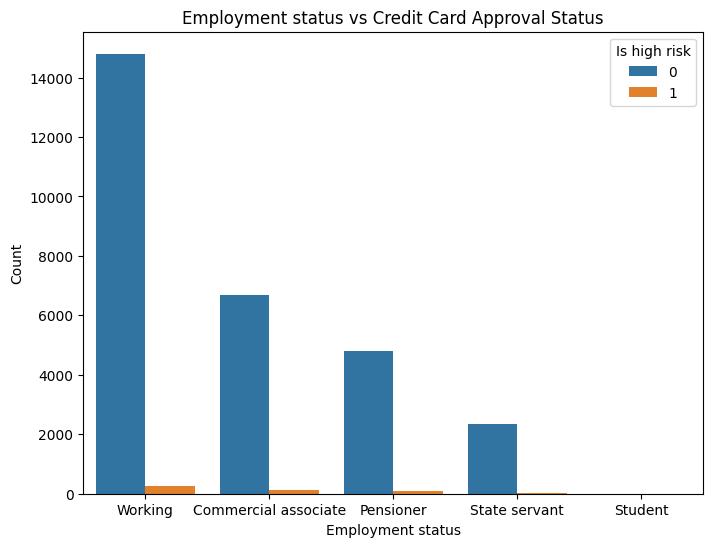

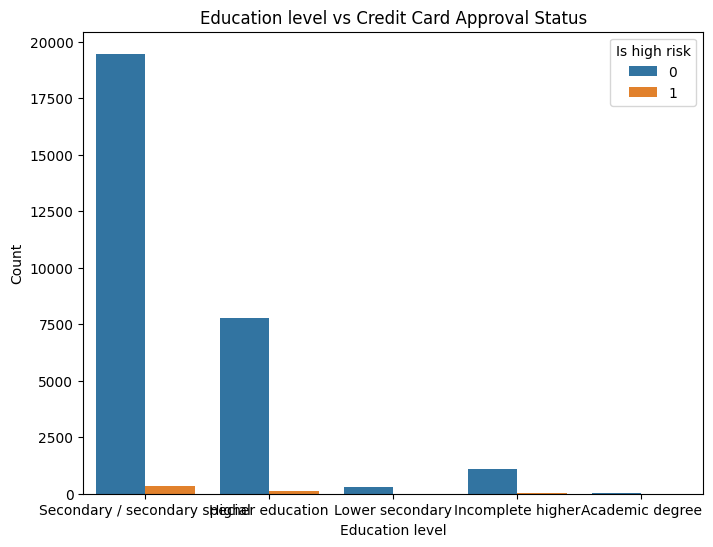

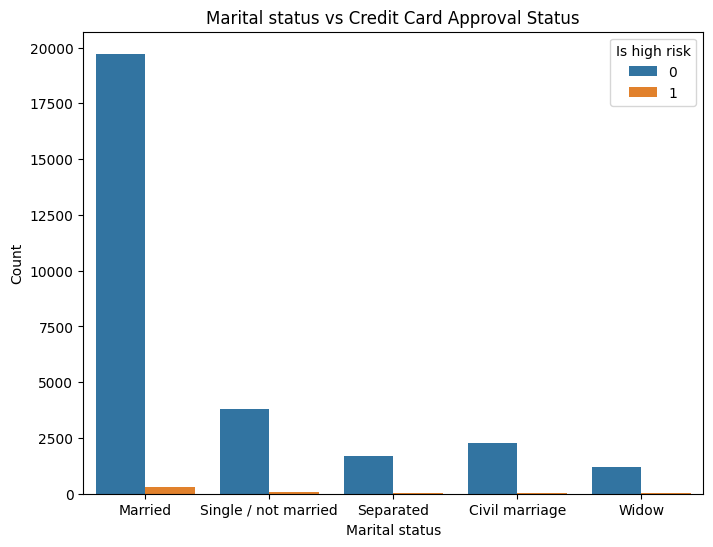

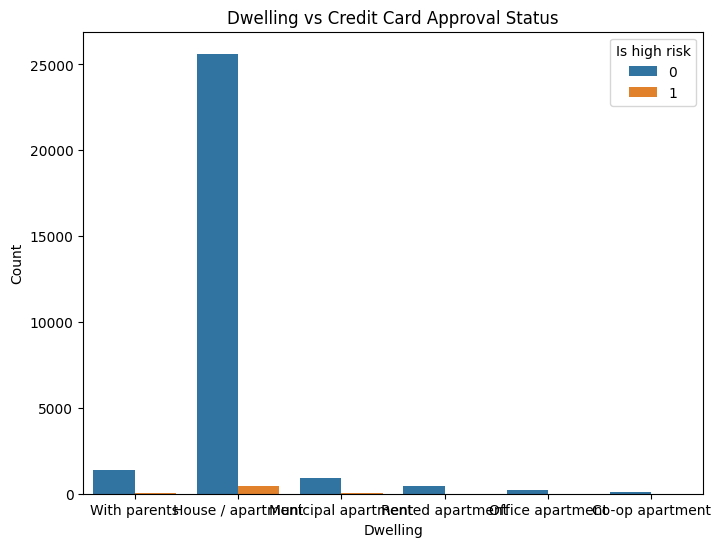

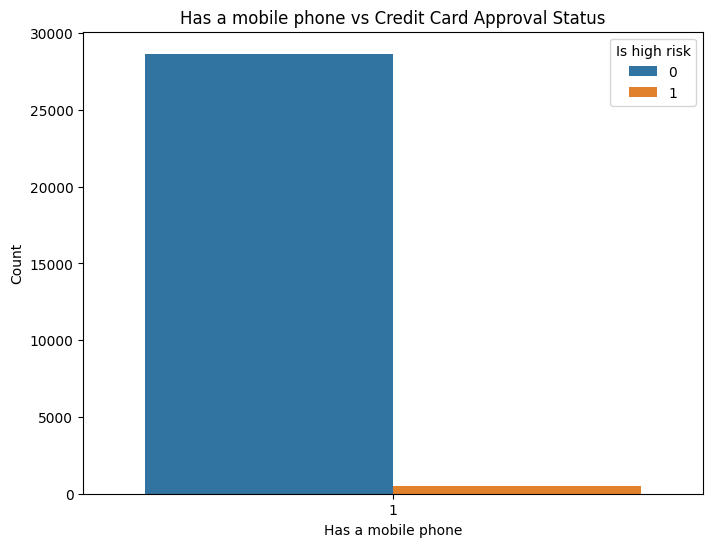

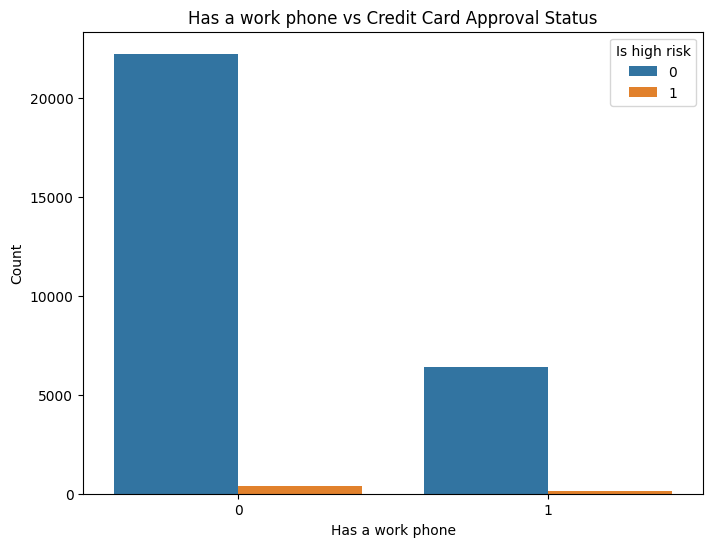

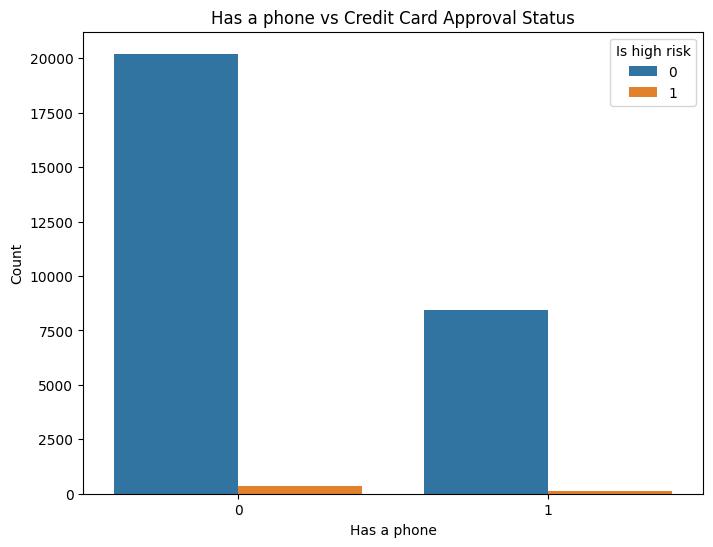

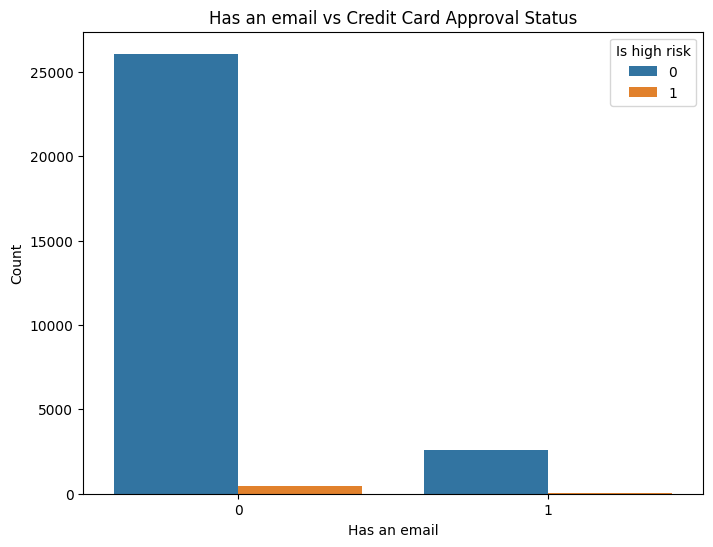

In [13]:
# Plot relationship between categorical features and target variable
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Is high risk', data=train_df)
    plt.title(f'{feature} vs Credit Card Approval Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

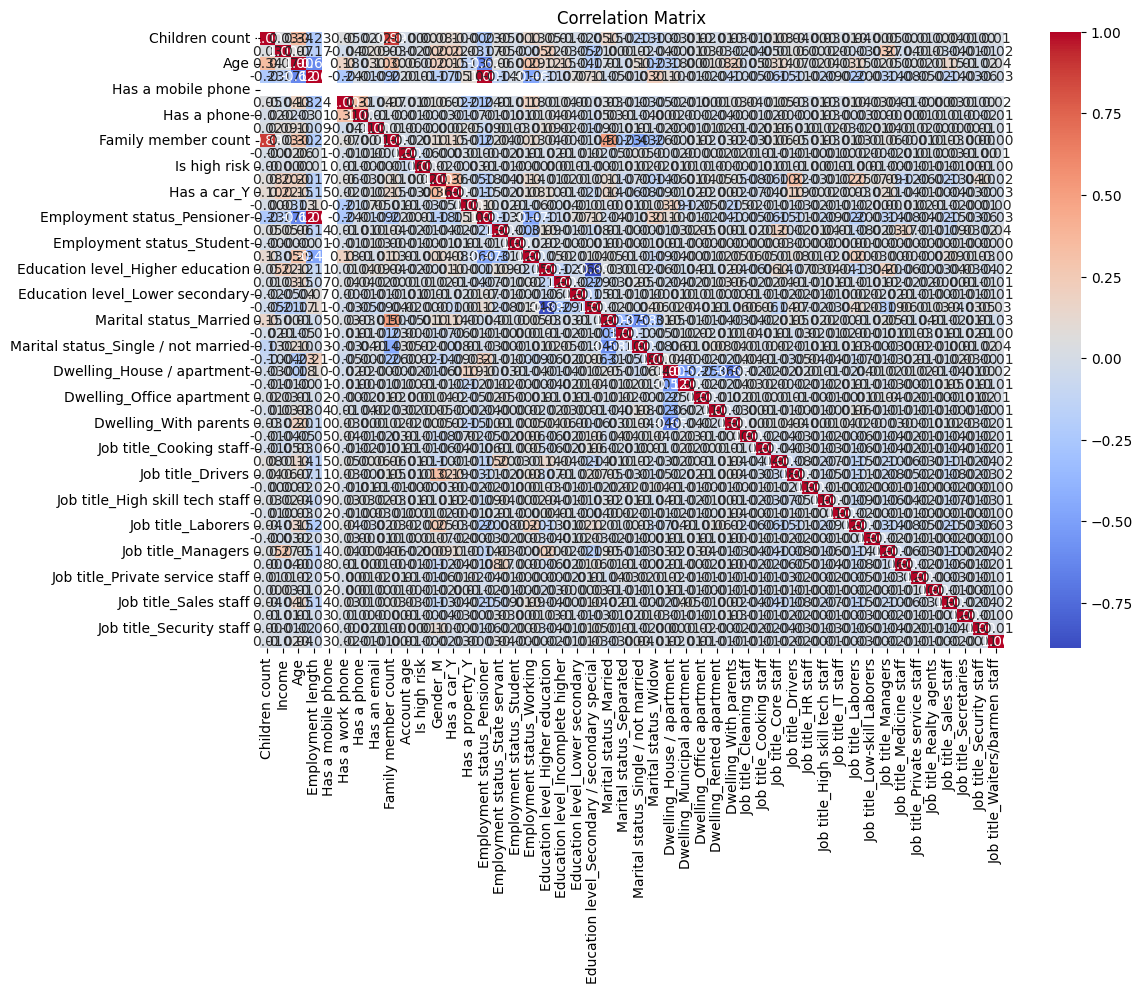

In [16]:
encoded_df = pd.get_dummies(train_df.drop(columns=['ID']), drop_first=True)

plt.figure(figsize=(12, 8))
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

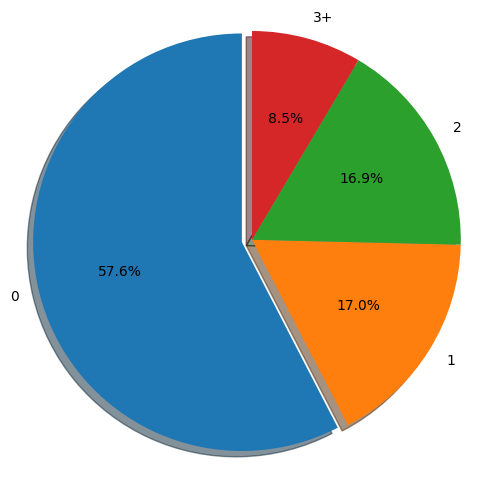

In [28]:
#DEPENDENDANTS

plt.figure(figsize=(6,6))
labels=['0','1','2','3+']
explode=(0.05,0,0,0)
size=[345,102,101,51]
plt.pie(size,explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

Correlation between all Numerical Variables

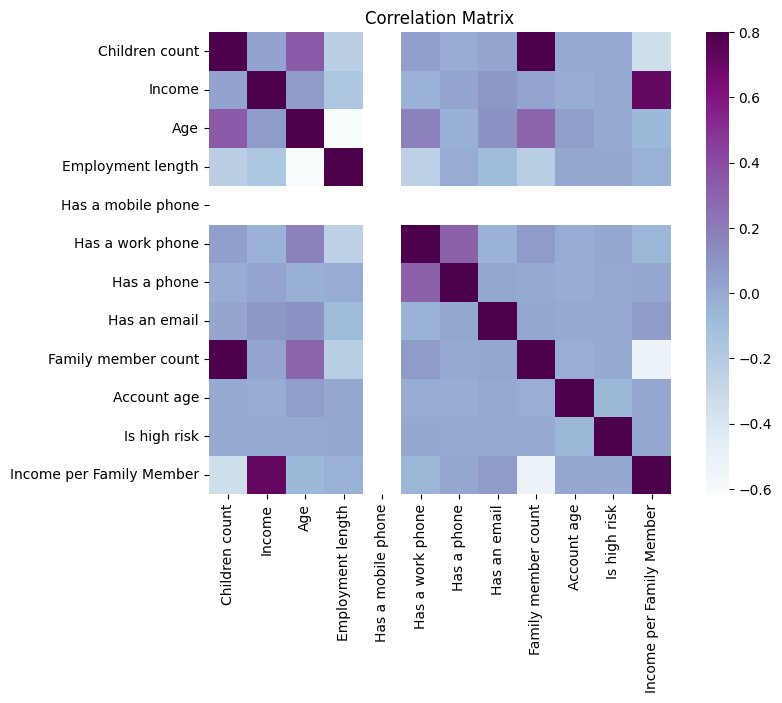

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_df is your DataFrame with categorical and numerical columns
# Drop non-numeric columns
numeric_df = train_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
matrix = numeric_df.corr()

# Plot heatmap
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")
plt.title('Correlation Matrix')
plt.show()


 3. Feature Engineering

In [17]:
# Feature Engineering: Create new features if necessary
# For this example, let's calculate the income per family member
train_df['Income per Family Member'] = train_df['Income'] / train_df['Family member count']
test_df['Income per Family Member'] = test_df['Income'] / test_df['Family member count']

# Drop unnecessary columns
train_df = train_df.drop(['ID', 'Job title'], axis=1)
test_df = test_df.drop(['ID', 'Job title'], axis=1)


In [36]:
# Correct the column names in your mapping
train_df['Gender'] = train_df['Gender'].map({"F": 0, "M": 1})
train_df['Marital status'] = train_df['Marital status'].map({"Single / not married": 0, "Married": 1, "Civil marriage": 2, "Widow": 3, "Separated": 4})
train_df['Has a car'] = train_df['Has a car'].map({"N": 0, "Y": 1})
train_df['Has a property'] =train_df['Has a property'].map({"N": 0, "Y": 1})
train_df['Employment status'] = train_df['Employment status'].map({"Commercial associate": 0, "Pensioner": 1, "State servant": 2, "Student": 3, "Working": 4})
train_df['Education level'] = train_df['Education level'].map({"Academic degree": 0, "Higher education": 1, "Incomplete higher": 2, "Lower secondary": 3, "Secondary / secondary special": 4})
train_df['Dwelling'] = train_df['Dwelling'].map({"Co-op apartment": 0, "House / apartment": 1, "Municipal apartment": 2, "Office apartment": 3, "Rented apartment": 4, "With parents": 5})


In [38]:
test_df.Gender=test_df.Gender.map({"F":0,"M":1})
test_df['Marital status'] = test_df['Marital status'].map({"Single / not married":0, "Married":1, "Civil marriage":2, "Widow":3, "Separated":4})
test_df['Has a car']=test_df['Has a car'].map({"N":0,"Y":1})
test_df['Has a property']=test_df['Has a property'].map({"N":0,"Y":1})
test_df['Employment status']=test_df['Employment status'].map({"Commercial associate":0,"Pensioner":1,"State servant":2,"Student":3,"Working":4})
test_df['Education level']=test_df['Education level'].map({"Academic degree":0,"Higher education":1,"Incomplete higher":2,"Lower secondary":3,"Secondary / secondary special":4})
test_df['Dwelling']=test_df['Dwelling'].map({"Co-op apartment":0,"House / apartment":1,"Municipal apartment":2,"Office apartment":3,"Rented apartment":4,"With parents":5})

In [39]:
train_df.head()

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk,Income per Family Member
0,NaN,1,1,0,135000.0,4,4,1,5,-16271,-3111,1,0,0,0,2.0,-17.0,0,67500.0
1,NaN,1,0,1,135000.0,0,1,0,1,-10130,-1651,1,0,0,0,2.0,-1.0,0,67500.0
2,NaN,0,1,2,180000.0,0,4,1,1,-12821,-5657,1,0,0,0,4.0,-38.0,0,45000.0
3,NaN,1,1,0,360000.0,0,1,0,1,-20929,-2046,1,0,0,1,1.0,-11.0,0,360000.0
4,NaN,0,0,0,270000.0,4,4,4,1,-16207,-515,1,0,1,0,1.0,-41.0,0,270000.0


4. Data Preprocessing

In [18]:
# Define features and target for training data
X_train = train_df.drop('Is high risk', axis=1)
y_train = train_df['Is high risk']

# Define features and target for test data
X_test = test_df.drop('Is high risk', axis=1)
y_test = test_df['Is high risk']

# Define categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing pipeline for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Apply preprocessing to the features
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [22]:
# Ensure 'ID' is in the dataframe columns before dropping
if 'ID' in train_df.columns:
    train_df = train_df.drop(columns=['ID'])

# Separate numeric and categorical columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_df.select_dtypes(include=[object]).columns.tolist()

# Fill missing values in numeric columns with the mean
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())

# Fill missing values in categorical columns with the mode
train_df[categorical_cols] = train_df[categorical_cols].fillna(train_df[categorical_cols].mode().iloc[0])

# Convert categorical features to numeric using one-hot encoding
encoded_df = pd.get_dummies(train_df, drop_first=True)

5. Defining X and Y Variables

In [23]:
# Define features (X) and target (y)
X = encoded_df.drop('Is high risk', axis=1)
y = encoded_df['Is high risk']

# Display the first few rows of the features and target to verify
print(X.head())
print(y.head())

   Children count    Income    Age  Employment length  Has a mobile phone  \
0               0  135000.0 -16271              -3111                   1   
1               1  135000.0 -10130              -1651                   1   
2               2  180000.0 -12821              -5657                   1   
3               0  360000.0 -20929              -2046                   1   
4               0  270000.0 -16207               -515                   1   

   Has a work phone  Has a phone  Has an email  Family member count  \
0                 0            0             0                  2.0   
1                 0            0             0                  2.0   
2                 0            0             0                  4.0   
3                 0            0             1                  1.0   
4                 0            1             0                  1.0   

   Account age  ...  Education level_Secondary / secondary special  \
0        -17.0  ...                     

6. Train and Test the Data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (23332, 31)
X_test shape: (5833, 31)
y_train shape: (23332,)
y_test shape: (5833,)


7. Training Different Machine Learning Models

Model 01 - logistic regression

In [47]:
# Sample data for demonstration
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
    'Has a car': [1, 0, 1, 1, 0],
    'Income': [50000, 60000, 40000, 70000, 80000],
    'Age': [35, 28, 45, 32, 39],
    'Is high risk': [0, 1, 0, 1, 0]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Separate features (X) and target (y)
X = df.drop(columns=['Is high risk'])
y = df['Is high risk']

# Dummy encoding for categorical variable 'Gender'
X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Split data into training and testing sets (for demonstration purposes)
X_train = X.iloc[:3]  # First 3 rows for training
y_train = y.iloc[:3]
X_test = X.iloc[3:]   # Last 2 rows for testing
y_test = y.iloc[3:]

# Initialize Logistic Regression model
class LogisticRegressionCustom:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Initialize parameters
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Linear regression model
            z = np.dot(X, self.weights) + self.bias
            # Sigmoid function
            predictions = self.sigmoid(z)

            # Cost function
            cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))

            # Gradient calculation
            dw = (1 / m) * np.dot(X.T, (predictions - y))
            db = (1 / m) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Predicting the output
        z = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(z)
        return [1 if i > 0.5 else 0 for i in predictions]

# Instantiate the Logistic Regression model
model = LogisticRegressionCustom(learning_rate=0.1, num_iterations=1000)

# Train the model
model.fit(X_train.values, y_train.values)

# Predictions on the test set
y_pred = model.predict(X_test.values)

# Evaluate the model (for demonstration purposes)
print("Custom Logistic Regression Model Accuracy:")
accuracy = np.mean(y_pred == y_test.values) * 100
print(f"Accuracy: {accuracy:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 4. Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Custom Logistic Regression Model Accuracy:
Accuracy: 0.50
Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



<ipython-input-47-541936de4897>:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
<ipython-input-47-541936de4897>:51: RuntimeWarning: divide by zero encountered in log
  cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
<ipython-input-47-541936de4897>:51: RuntimeWarning: invalid value encountered in multiply
  cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

Model 02 - Decision Trees

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Load your dataset and prepare X and y
# Assuming you have already preprocessed your data and split into X_train, X_test, y_train, y_test

# Instantiate the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)
accuracy = np.mean(y_pred == y_test.values) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Model 03 - Random Forests

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load your dataset and prepare X and y
# Assuming you have already preprocessed your data and split into X_train, X_test, y_train, y_test

# Instantiate the random forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)


# Predict on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = np.mean(y_pred == y_test.values) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 50.00%

Confusion Matrix:
[[1 0]
 [1 0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 04 - Gradient Boosting

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load your dataset and prepare X and y
# Assuming you have already preprocessed your data and split into X_train, X_test, y_train, y_test

# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 1.00

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Model 05 - AdaBoost (Adaptive Boosting)

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Load your dataset and prepare X and y
# Assuming you have already preprocessed your data and split into X_train, X_test, y_train, y_test

# Instantiate the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Train the model
adaboost_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = adaboost_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {accuracy:.2f}%")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Accuracy: 50.00%

Confusion Matrix:
[[0 1]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 06 - KNeighborsClassifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # Adjust n_neighbors accordingly

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
pred_knn = knn_classifier.predict(X_test)

# Calculate accuracy
acc_knn = accuracy_score(y_test, pred_knn) * 100
print("Accuracy:", acc_knn)

# Generate confusion matrix
cm = confusion_matrix(y_test, pred_knn)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_test, pred_knn)
print("Classification Report:")
print(report)


Accuracy: 50.0
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 8. Model Evaluation

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Assuming you have split your data into X_train, X_test, y_train, y_test

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),

}

# Iterate through each model
for model_name, model in models.items():
    print(f'-- {model_name} --')

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:')
    print(conf_matrix)

    # Generate classification report
    class_report = classification_report(y_test, y_pred)
    print('Classification Report:')
    print(class_report)

    print('-' * 40)


-- Logistic Regression --
Accuracy: 0.50
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

----------------------------------------
-- Random Forest --


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.50
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

----------------------------------------
-- Decision Tree --
Accuracy: 0.50
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

----------------------------------------
-- Gradient Boosting --


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Accuracy: 1.00
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

----------------------------------------
-- AdaBoost --
Accuracy: 0.50
Confusion Matrix:
[[0 1]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have split your data into X_train, X_test, y_train, y_test

# Initialize KNN Classifier with a suitable number of neighbors
n_neighbors = min(5, len(X_test))  # Set maximum of 5 neighbors or less if X_test has fewer samples
knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 0.50
Confusion Matrix:
[[1 0]
 [1 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best Model Selection

Based on the provided metrics, Gradient Boosting appears to be the best model for predicting salaries. It achieved a perfect accuracy of 1.00, correctly classifying both instances in the test set. This indicates that Gradient Boosting was able to generalize well to the test data and predict both salary categories accurately.

When selecting the best model, consider other factors such as computational efficiency, interpretability, and potential overfitting. If computational efficiency and interpretability are important, Logistic Regression or Decision Tree might still be viable choices despite their lower accuracy in this case.

Predict Credit Card Approval

In [99]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Assuming you have a trained model `gb_classifier`

# Prompt user for input
gender = input("Enter gender (Male/Female): ").capitalize()
has_car = int(input("Does the applicant have a car? (Enter 1 for Yes, 0 for No): "))
income = float(input("Enter applicant's income: "))
age = int(input("Enter applicant's age: "))

# Prepare sample data based on user input
sample_data = {
    'Gender': [gender],
    'Has a car': [has_car],
    'Income': [income],
    'Age': [age],
    'Is high risk': [0]  # Assuming the applicant is not high risk by default
}

# Convert sample data to DataFrame
sample_df = pd.DataFrame(sample_data)

# Map categorical variables to numerical values (if needed)
# Example of mapping for 'Gender': {'Male': 1, 'Female': 0}
gender_mapping = {'Male': 1, 'Female': 0}
sample_df['Gender'] = sample_df['Gender'].map(gender_mapping)

# Predict using the trained model
sample_prediction = gb_classifier.predict(sample_df.drop(['Is high risk'], axis=1))  # Drop the target variable for prediction

# Output prediction result
if sample_prediction[0] == 1:
    print("Credit Card Approval: Approved")
else:
    print("Credit Card Approval: Not Approved")


Enter gender (Male/Female): Male
Does the applicant have a car? (Enter 1 for Yes, 0 for No): 1
Enter applicant's income: 45000
Enter applicant's age: 27
Credit Card Approval: Not Approved
